# Decision Tree

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

### Planning

Data set: titanic
y(Target): survived

x (features): c;ass, embark town, fare cost, dependent

In [2]:
# tab data
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# data cleaning and importing
from pydataset import data
from prepare import prep_titanic, split_data
from env import get_db_url
from acquire import get_titanic_data

### Acquire
- import from acquire file

In [3]:
# importinng DS
df = get_titanic_data()

### Prepare 
- clean and split the data

In [39]:
# CCleaning the data set
df = prep_titanic(df)

In [40]:
# splitting the data
train, validate, test = split_data(df, target='survived')

In [41]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
485,0,3,female,29.699118,3,1,25.4667,S,Southampton,0,0,1,0
359,1,3,female,29.699118,0,0,7.8792,Q,Queenstown,1,1,0,0
562,0,2,male,28.000000,0,0,13.5000,S,Southampton,1,0,1,1
310,1,1,female,24.000000,0,0,83.1583,C,Cherbourg,1,0,0,0
30,0,1,male,40.000000,0,0,27.7208,C,Cherbourg,1,0,0,1


### Exploration
- skip for now becasue not complete
- create a a baseline

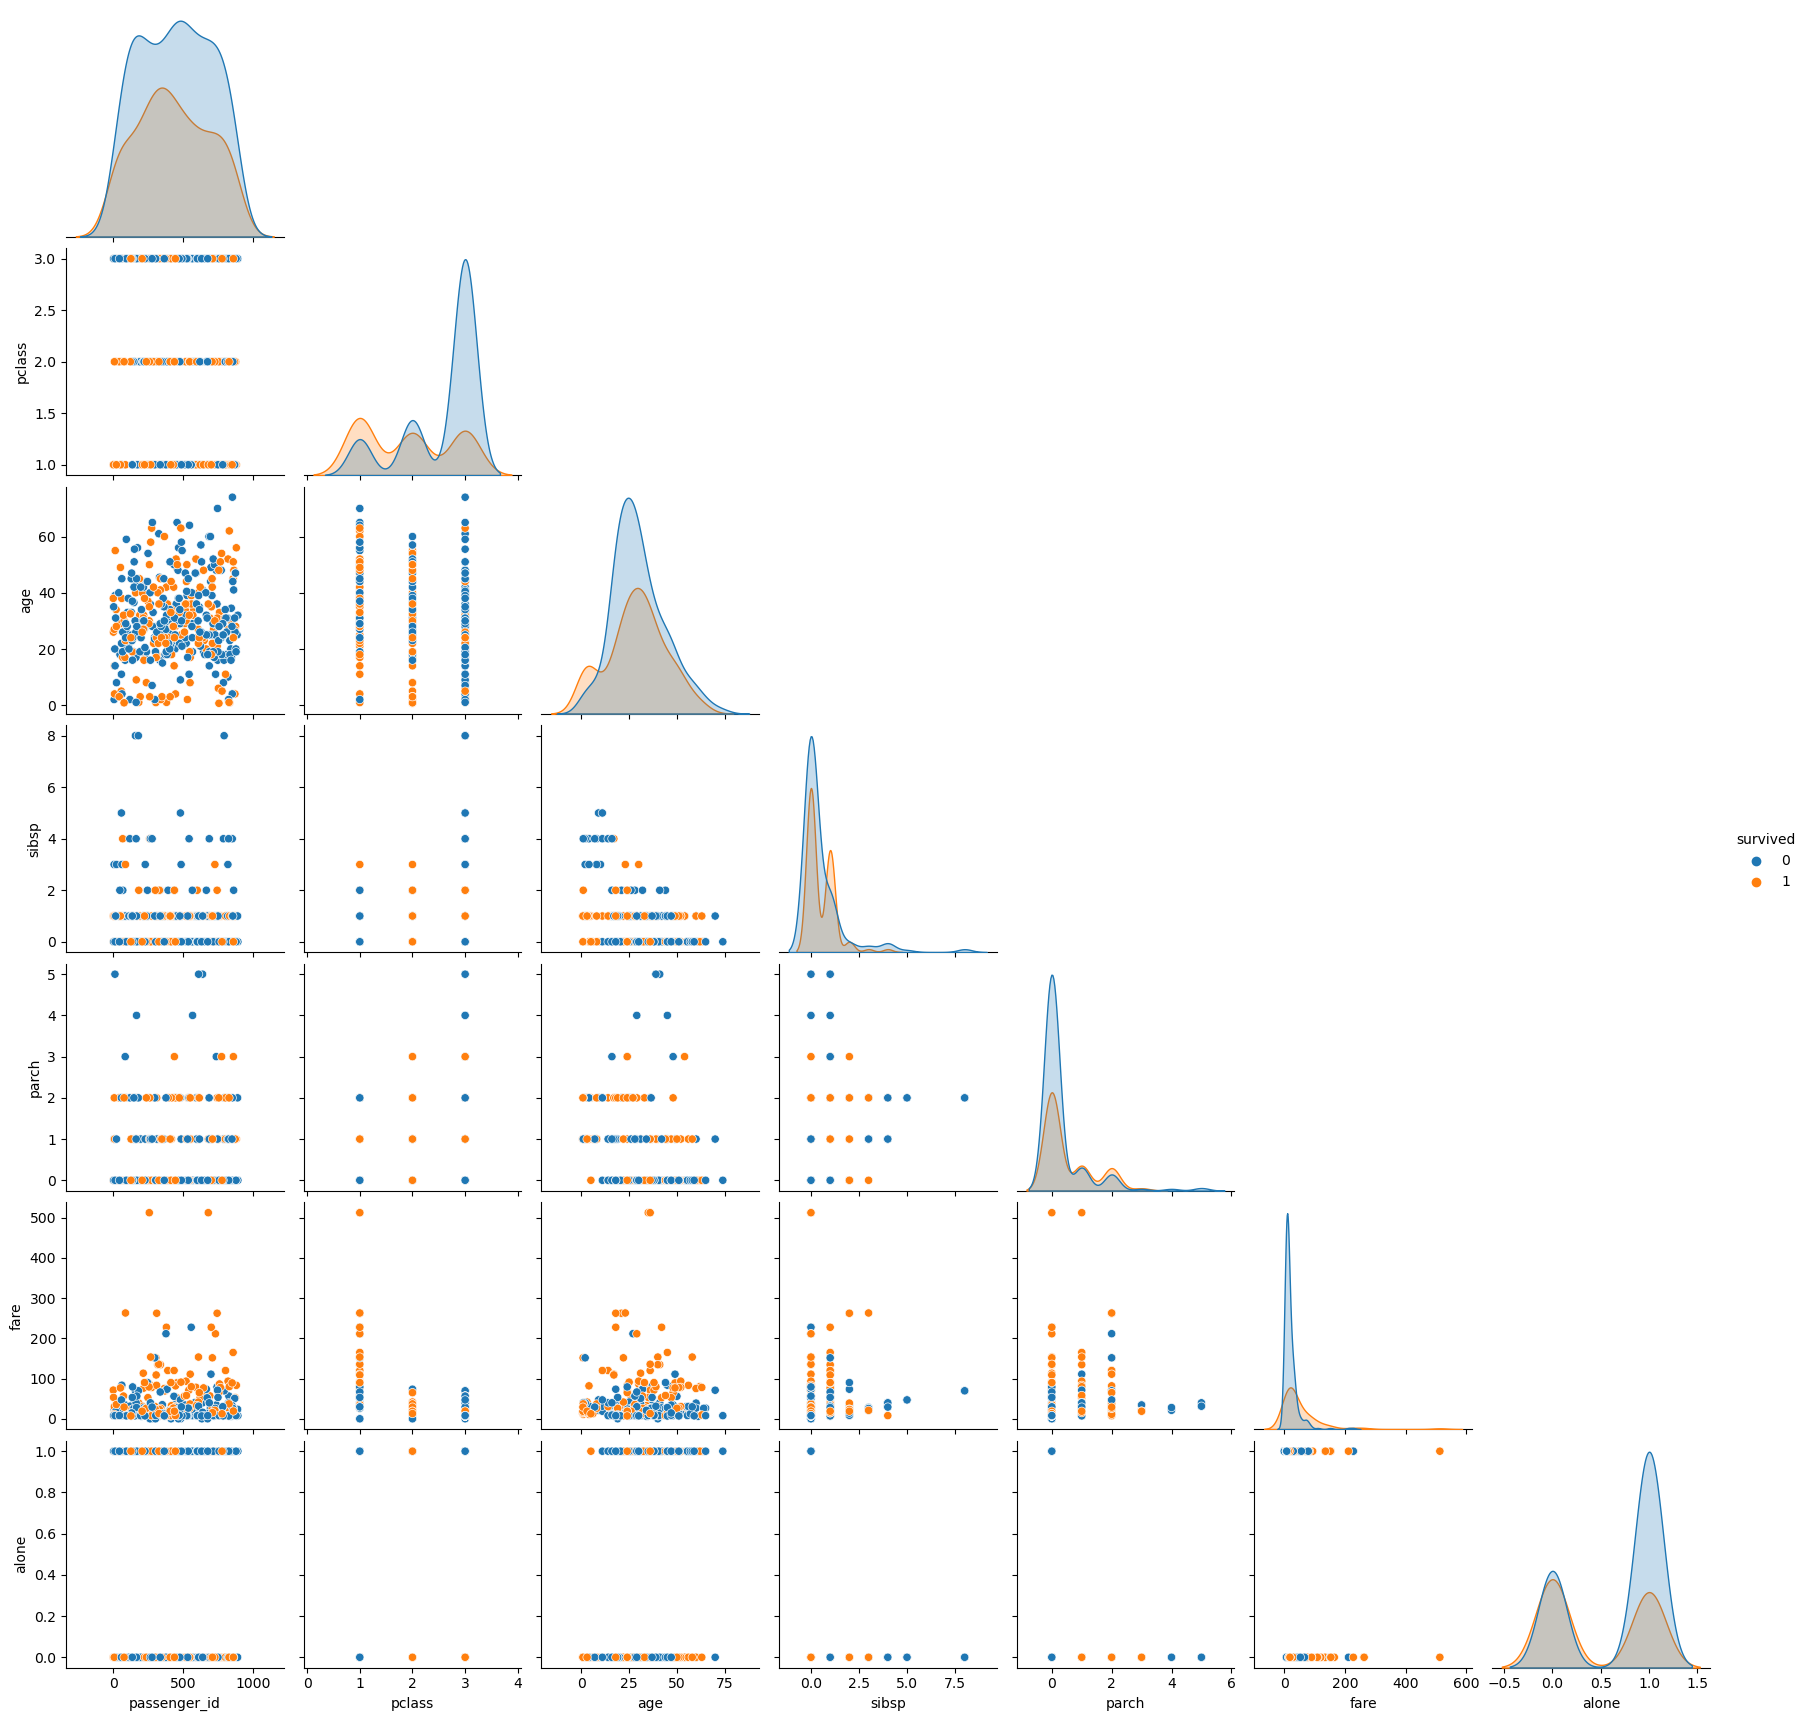

In [23]:
sns.pairplot(train, hue = 'survived', corner=True)
plt.show()

>Takeaways/features of interest:
>- pclass, fare, sex, alone

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [7]:
# the baseline is the most common occuring outcome in this casre the basline
# id 0 or did not survuve
train['survived'].value_counts()

0    307
1    191
Name: survived, dtype: int64

In [8]:
# Creating a new columns with the baseline predicions 
train['baseline'] = 0

In [12]:
# checking the classification report to see how well the baseline worked
print(classification_report(train['survived'], train['baseline']))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       191

    accuracy                           0.62       498
   macro avg       0.31      0.50      0.38       498
weighted avg       0.38      0.62      0.47       498



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# manually calculating the accuracy
baseline_accuracy = (train['survived'] == train['baseline']).mean()
baseline_prediction = train['baseline']
print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

Baseline Accuracy: 61.65%


### Model
- Assigns features of interest to X_train
- assign series with the targte to y_train

- #### make
    - 
- fit
- use

In [43]:
# assinging target
y_col = 'survived'


# # assigning features: this is the more programmatic way, but I didnt clean my data well
# I think it will be beneficial fro me to have a humans cleaned and prepped ds and a computer cleaned ds
# Because it seems that the extra variables that are not useful need to be dropped
# x_col = train.columns.to_list()
# x_col.remove(y_col)
# x_col

# redo of the features tbh
x_col = ['pclass',
 'age',
 'fare',
 'alone',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'sex_male']

In [45]:
# assigning the target's values
y_train = train[y_col]

In [44]:
# assinging features to X_train
X_train = train[x_col]


In [29]:
# make the decision tree
# first is unlimited depth
clf0 = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier(max_depth=1)
clf2 = DecisionTreeClassifier(max_depth=2)
clf3 = DecisionTreeClassifier(max_depth=3)

In [47]:
# fitting the ds
clf0.fit(X_train, y_train)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
# using the decision trees
model0_preds = clf0.predict(X_train)
model1_preds = clf1.predict(X_train)
model2_preds = clf2.predict(X_train)
model3_preds = clf3.predict(X_train)

In [54]:
print(f'CLF0:\n{classification_report(y_train, model0_preds)}\n\n')
print(f'CLF1:\n{classification_report(y_train, model1_preds)}\n\n')
print(f'CLF2:\n{classification_report(y_train, model2_preds)}\n\n')
print(f'CLF3:\n{classification_report(y_train, model3_preds)}\n\n')

CLF0:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       307
           1       1.00      0.98      0.99       191

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



CLF1:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       307
           1       0.76      0.66      0.71       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.79      0.79      0.79       498



CLF2:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.80       498
weighted avg       0.81      0.81      0.81       49

> #### Takeways:
>- The best performing model osi the model with no max depth set, but this is likely a case of overfitting
>- The second best model created is the model with a max depth of 3, 

> #### Actions: 
>- I will run both model 3 and model 0 on the validate set to see how much of a dropoff occurs with the accuract, prediciton, recall, etc

### Evaluate
- find the baseline and predict

In [63]:
# Validating model 3 and model 0 woth onmly predictions and scoring
model0_val_preds = clf0.predict(validate[x_col])
model1_val_preds = clf1.predict(validate[x_col])
model2_val_preds = clf2.predict(validate[x_col])
model3_val_preds = clf3.predict(validate[x_col])

In [61]:
# Getting the classification reports for model 0: there is definitel  a case of over fitting happening on this
# there is a roughly 25% drop in all scores for model 0
print(f'CLF0 Train:\n{classification_report(y_train, model0_preds)}\n\n')
print(f'CLF0 Validate:\n{classification_report(validate[y_col], model0_val_preds)}\n\n')

CLF0:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       307
           1       1.00      0.98      0.99       191

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



CLF0:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       132
           1       0.68      0.72      0.70        82

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214





In [65]:
# smaller dop off on model 1 compared to model with roughly the same scores as 
print(f'CLF1 Train:\n{classification_report(y_train, model1_preds)}\n\n')
print(f'CLF1 Validate:\n{classification_report(validate[y_col], model1_val_preds)}\n\n')

CLF1:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       307
           1       0.76      0.66      0.71       191

    accuracy                           0.79       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.79      0.79      0.79       498



CLF1:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       132
           1       0.68      0.63      0.66        82

    accuracy                           0.75       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.75      0.75       214





In [66]:
print(f'CLF2 Train:\n{classification_report(y_train, model2_preds)}\n\n')
print(f'CLF2 Validate:\n{classification_report(validate[y_col], model2_val_preds)}\n\n')

CLF2:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.80       498
weighted avg       0.81      0.81      0.81       498



CLF2:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       132
           1       0.66      0.67      0.67        82

    accuracy                           0.74       214
   macro avg       0.73      0.73      0.73       214
weighted avg       0.74      0.74      0.74       214





In [68]:
# there appears to be a roughly 5% dop in accuracy from this data set
# I
print(f'CLF3 Train:\n{classification_report(y_train, model3_preds)}\n\n')
print(f'CLF3 Validate:\n{classification_report(validate[y_col], model3_val_preds)}\n\n')

CLF3 Train:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       307
           1       0.82      0.71      0.76       191

    accuracy                           0.83       498
   macro avg       0.83      0.81      0.81       498
weighted avg       0.83      0.83      0.83       498



CLF3 Validate:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       132
           1       0.72      0.66      0.69        82

    accuracy                           0.77       214
   macro avg       0.76      0.75      0.75       214
weighted avg       0.77      0.77      0.77       214





> #### Takeaways:
>- The model1 seems to have the best performance when going from the train dataset to the validate data set, but overall it seems that model3 may be the best
> #### Actions:
>- I'm not going to take any actions, but in real life I would go back and re-prep the data